In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [25]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDE', org=(50,300), fontFace=font, fontScale=5, color=(255,255,255), thickness=25)
    return blank_img

In [26]:
def display_img(img):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [33]:
img = load_img()

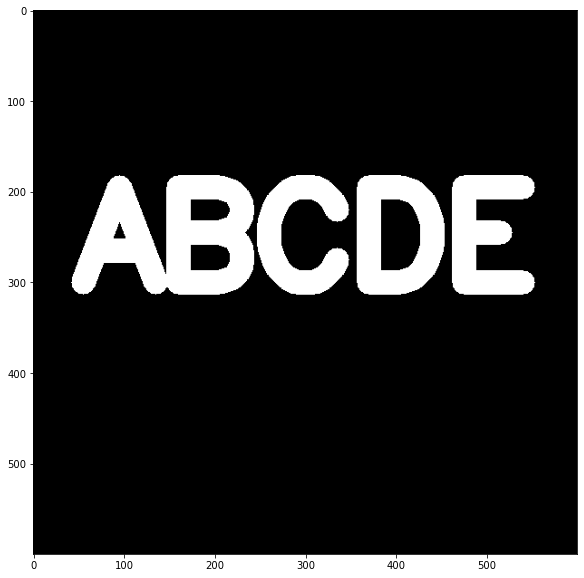

In [38]:
display_img(img)

In [39]:
kernel = np.ones((5,5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [40]:
result = cv2.erode(img, kernel, iterations=5)

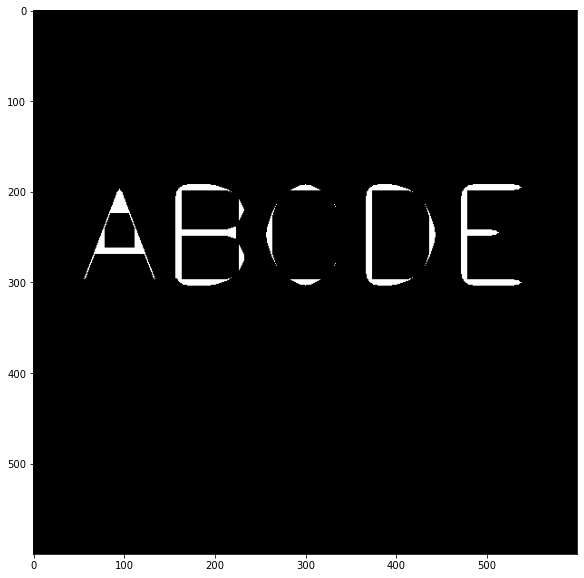

In [41]:
display_img(result)

In [43]:
white_noise = np.random.randint(low=0, high=2, size=(600,600))  # Returns value btw 0 and 1 (up to but not including 2)

In [45]:
white_noise

array([[1, 0, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 1, 1, 1]])

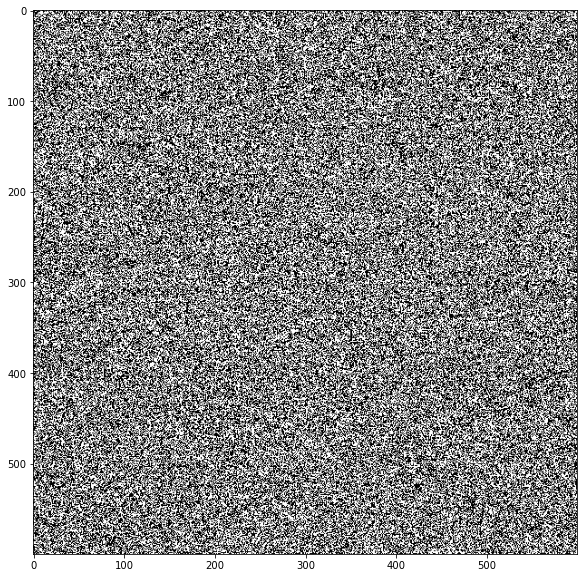

In [47]:
display_img(white_noise)

In [48]:
img.max()

255.0

In [49]:
white_noise *=255
white_noise

array([[255,   0,   0, ..., 255,   0, 255],
       [255,   0, 255, ...,   0, 255, 255],
       [  0,   0,   0, ...,   0, 255, 255],
       ...,
       [  0, 255,   0, ...,   0, 255, 255],
       [  0,   0,   0, ..., 255,   0, 255],
       [255,   0, 255, ..., 255, 255, 255]])

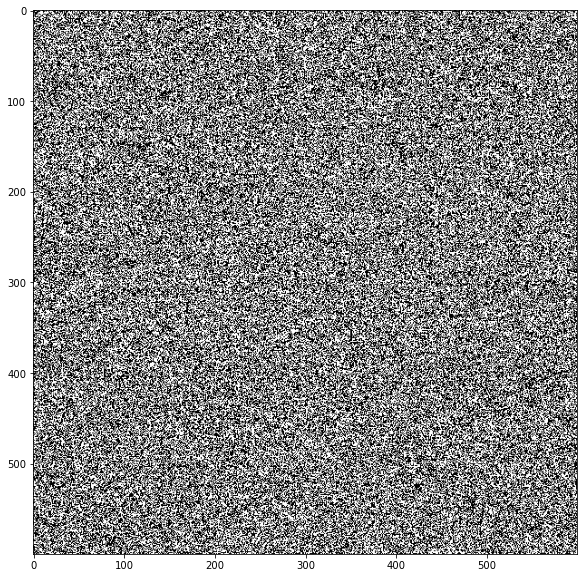

In [50]:
display_img(white_noise)

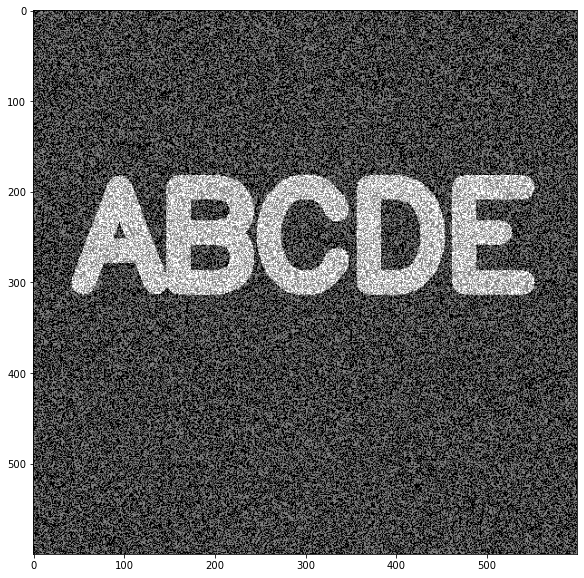

In [51]:
noise_img = white_noise + img
display_img(noise_img)

In [52]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

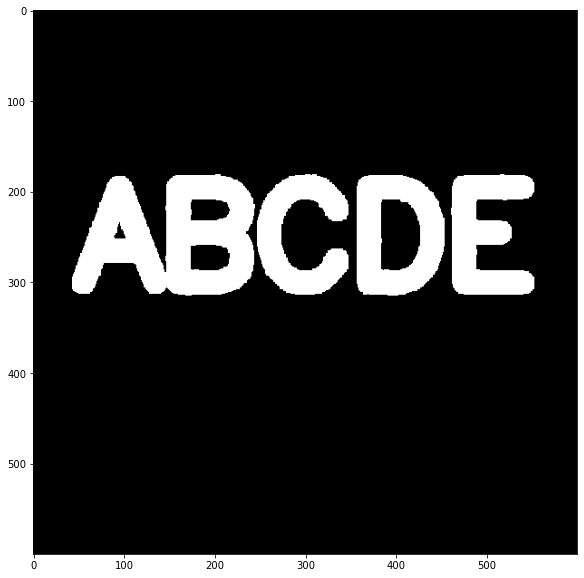

In [53]:
display_img(opening)

In [54]:
img = load_img()

In [70]:
black_noise = np.random.randint(low = 0, high = 2, size = (600,600))

In [71]:
black_noise *= -255   # RANDOMLY SUBTRACT 255 TO THE ORIGINAL IMAGE => TURN IT TO BLACK. WE'LL FIX NEGATIVE VALUES (-255) IN LINE 62

In [72]:
black_noise  

array([[   0, -255,    0, ...,    0,    0, -255],
       [   0, -255,    0, ..., -255, -255, -255],
       [   0, -255, -255, ...,    0,    0,    0],
       ...,
       [   0, -255,    0, ..., -255,    0,    0],
       [   0,    0,    0, ..., -255, -255,    0],
       [-255, -255,    0, ..., -255,    0,    0]])

In [73]:
black_noise_img = img + black_noise

In [74]:
black_noise_img

array([[   0., -255.,    0., ...,    0.,    0., -255.],
       [   0., -255.,    0., ..., -255., -255., -255.],
       [   0., -255., -255., ...,    0.,    0.,    0.],
       ...,
       [   0., -255.,    0., ..., -255.,    0.,    0.],
       [   0.,    0.,    0., ..., -255., -255.,    0.],
       [-255., -255.,    0., ..., -255.,    0.,    0.]])

In [75]:
black_noise_img[black_noise_img == -255] = 0

In [77]:
black_noise_img.min()

0.0

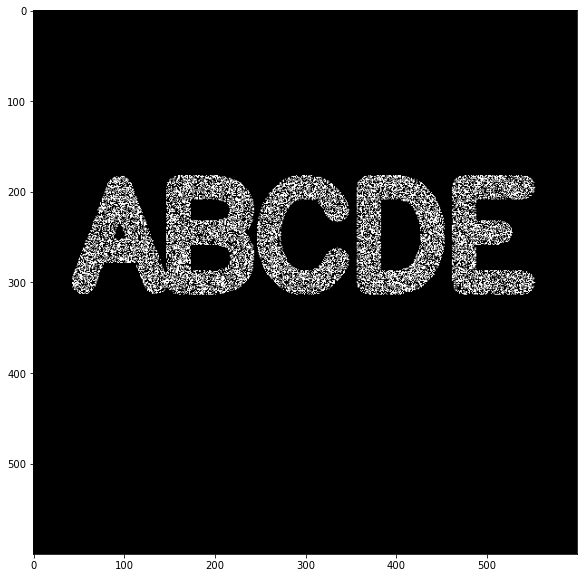

In [78]:
display_img(black_noise_img)

In [81]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)    #REMOVING FOREGROUND NOIE

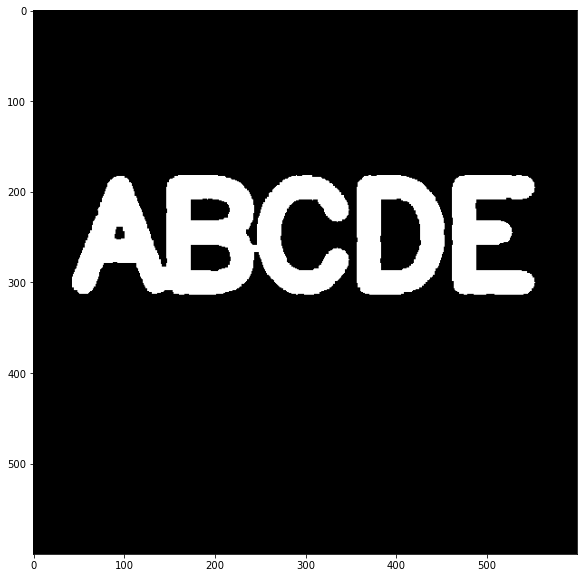

In [82]:
display_img(closing)

In [83]:
##### MORPHOLOGICAL GRADIENT ##################

In [84]:
img = load_img()

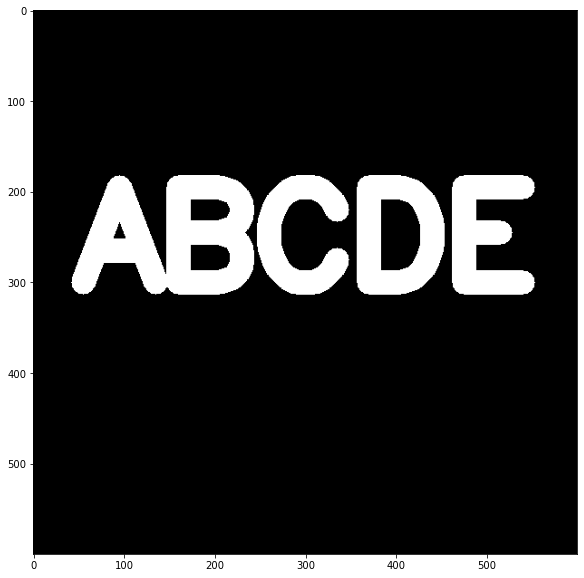

In [85]:
display_img(img)

In [86]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

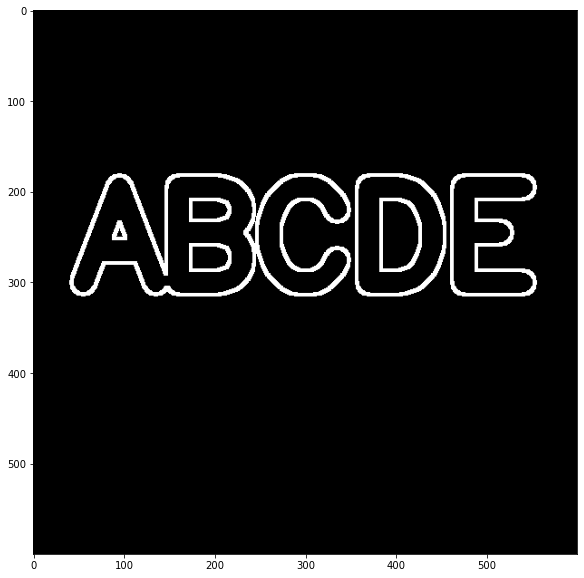

In [89]:
display_img(gradient)   #YOU CAN SEE THAT IT'S ONE METHOD OF EDGE DETECTION